# **STAT306 Project**
group members: Felix Li, Amin A. Mezouari, David Perez, JingHan Xu

In [1]:
library(tidyverse)
library(tidymodels)
library(leaps)
library(glmnet)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.1
✔ infer        1.0.3     ✔ workflows    1.1.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.2     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## Raw data

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
dir.create("data")
destFile <- "data/localfile.data"
download.file(url, destFile)

In [3]:
raw_mpg_data <- read.delim("data/localfile.data", sep= "", header = FALSE)

mpg_data_2 <- raw_mpg_data %>% mutate(mpg = V1, cylinders = V2, displacement =V3, hoursepower = V4, 
                    weight = V5, acceleration = V6, model_year = V7, origin = V8, car_name = V9)

mpg_data_tidy<- mpg_data_2 %>% select(mpg,cylinders,displacement,hoursepower,weight,acceleration,model_year,origin,car_name)
head(mpg_data_tidy)

,mpg,cylinders,displacement,hoursepower,weight,acceleration,model_year,origin,car_name
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


# Analysis

In [4]:
mpg_data_tidy$cylinders <- as.factor(mpg_data_tidy$cylinders)

mpg_data_tidy$hoursepower <- as.integer(mpg_data_tidy$hoursepower)

mpg_data <- mpg_data_tidy %>% 
        select(mpg,cylinders,displacement,hoursepower,weight,acceleration) %>%
        filter(!is.na(mpg_data_tidy$hoursepower)) 


head(mpg_data)
levels(mpg_data$cylinders)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,mpg,cylinders,displacement,hoursepower,weight,acceleration
,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,18,8,307,130,3504,12.0
2,15,8,350,165,3693,11.5
3,18,8,318,150,3436,11.0
4,16,8,304,150,3433,12.0
5,17,8,302,140,3449,10.5
6,15,8,429,198,4341,10.0


[1] "3" "4" "5" "6" "8"

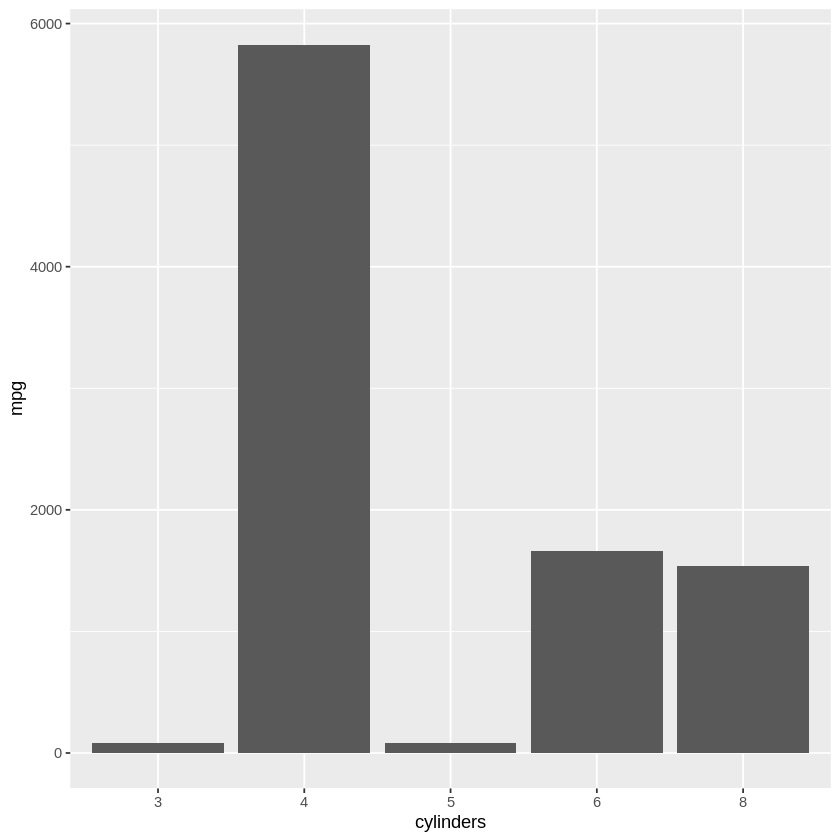

In [5]:
p<-ggplot(data=mpg_data, aes(x=cylinders, y=mpg)) +
  geom_bar(stat="identity")
p